In [1]:
#Set up Working directory and import packages

import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

os.getcwd()
os.chdir('C:\\Users\\Daisy W')

In [2]:
#Read raw data file

tweet_data_path = 'youthleadership_all.txt'

tweets_data = []

tweets_file = open(tweet_data_path, 'r')
for line in tweets_file:
    try:
        tweet  = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print(len(tweets_data))

203543


In [3]:
#check the converted data and dictionary keys

tweets_data [5]
print(tweets_data[5].keys())

#create a list for the main tweets text body

tweets = tweets_data[5]
texts = []

for tweets in tweets_data:
    try:
        text = tweets['text']
        texts.append(text)
    except:
        continue

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


In [4]:
#Check results.NOTE that texts length is less than Tweets_data length.The raw file may contain incomplete items.

print(texts[201000])
print(len(texts))


RT @HerbMcDerb: Me as a youth basketball coach. Young Bob Knight https://t.co/4HMjtWCNc3
203330


In [5]:
#Write the list into a file

from os import path

with open('texts_from_tweets.txt', 'w') as fp:
    for line in texts:
        try:
            fp.write(line+'\n')
        except:
            continue

In [96]:
#Add customed Stopword and generate word cloud

stopwords = STOPWORDS.copy()
stopwords.add("RT")
stopwords.add("youth")
stopwords.add("https")
stopwords.add("day")
stopwords.add("look")
stopwords.add("say")
stopwords.add("new")
stopwords.add("will")
stopwords.add("see")
stopwords.add("people")
stopwords.add("pll")
stopwords.add("make")
stopwords.add("among")
stopwords.add("old")
stopwords.add("right")
stopwords.add("Thank")
stopwords.add("come")
stopwords.add("great")
stopwords.add("size")
stopwords.add("city")
stopwords.add("story")

print(stopwords)

stopwords.update({'rt'},{'t'},{'s'},{'us'},{'now'},{'tomorrow'},{'y'},{'o'},{'1'},{'2'},
                {'3'},{'4'},{'5'},{'6'},{'7'},{'8'},{'9'},{'10'},{'also'},{'ya'},{'e'},
                {'ve'},{'re'},{'never'},{'away'},{'ji'},{'v'},{'other'},{'another'},{'two'},{'one'},
                {'three'},{'does'},{'lie'},{'retweets'},{'retweet'},{'vs'},{'k'},{'ki'},{'htt'},{'beside'},{'already'},
                {'fucking'},{'f**king'},{'f*cking'},{'im'},{'GOD'},{'god'},{'want'},{'de'},{'pic'},{'ppl'},{'best'},
                {'feel'},{'every'},{'got'},{'first'},{'First'},{'let'},{'Let'},{'co'},{'amp'},{'w'},'young','today','use',
                {'watch'},{'time'},{'bb'},{'year'},{'12'},{'need'},{'good'},{'makes'},{'says'},{'20'},{'go'},{'u'},{'30'},{'must'},
                {'c'},{'d'},{'40'},{'better'},{'last'},{'18'},{'si'},{'l'},{'find'},{'well'},{'un'},{'yes'},{'14'},{'big'},
                {'ll'},{'said'},{'month'},{'11'},{'meet'},{'46'},{'17'},{'lot'},{'54'},{'000'},{'b'},{'15'},{'24'},{'msg'},{'ever'},
                {'men'},{'true'},{'tv'},{'dr'},{'cm'},{'bad'},{'sunday'},{'Sunday'},{'sundays'},{'Sundays'},{'je'},{'st'},{'anyone'},
                {'ask'},{'doesn'},{'does'},{"doesn't"},{'f'},{'hard'},{'um'},{'dear'},{'oh'},{'dm'},{'gets'},{'nice'},{'link'},
                {'wonderful'},{'ls'},{'saw'},{'show'},{'today '},{'happy'},{'think'},{'keep'},{'back'},{'world'})


len(stopwords)

{'of', '', 'do', 'day', 'in', 'is', 'they', 'we', 'against', 'her', "you're", 'below', 'having', 'me', "can't", 'too', 'it', 'herself', "we've", 'over', "i'll", 'look', 'ours', 'been', 'does', 'them', 'very', 'people', 'but', "shan't", 'ought', 'RT', 'how', 'the', 'should', 'have', 'you', 'being', 'its', 'just', "she's", 'yourselves', 'each', 'city', 'between', 'than', 'did', 'would', 'see', 'off', 'among', 'their', 'has', 'own', 'his', 'themselves', 'your', "we'll", 'pll', 'a', 'will', 'other', 'not', "you've", 'www', 'could', 'by', "when's", 'where', 'great', "where's", 'theirs', "hasn't", 'those', "haven't", 'doing', 'more', "they'll", 'had', 'that', 'above', 'because', 'once', 'from', 'like', "didn't", 'both', 'with', 'this', 'most', 'after', 'story', "she'd", 'or', 'http', "mustn't", "hadn't", 'any', 'Thank', "wasn't", 'i', 'for', 'come', 'make', 'itself', 'new', "here's", "we're", "aren't", "don't", 'size', "they'd", "let's", 'com', 'so', 'as', 'nor', "i'm", "he'll", "you'll", 'a

344

<function matplotlib.pyplot.show>

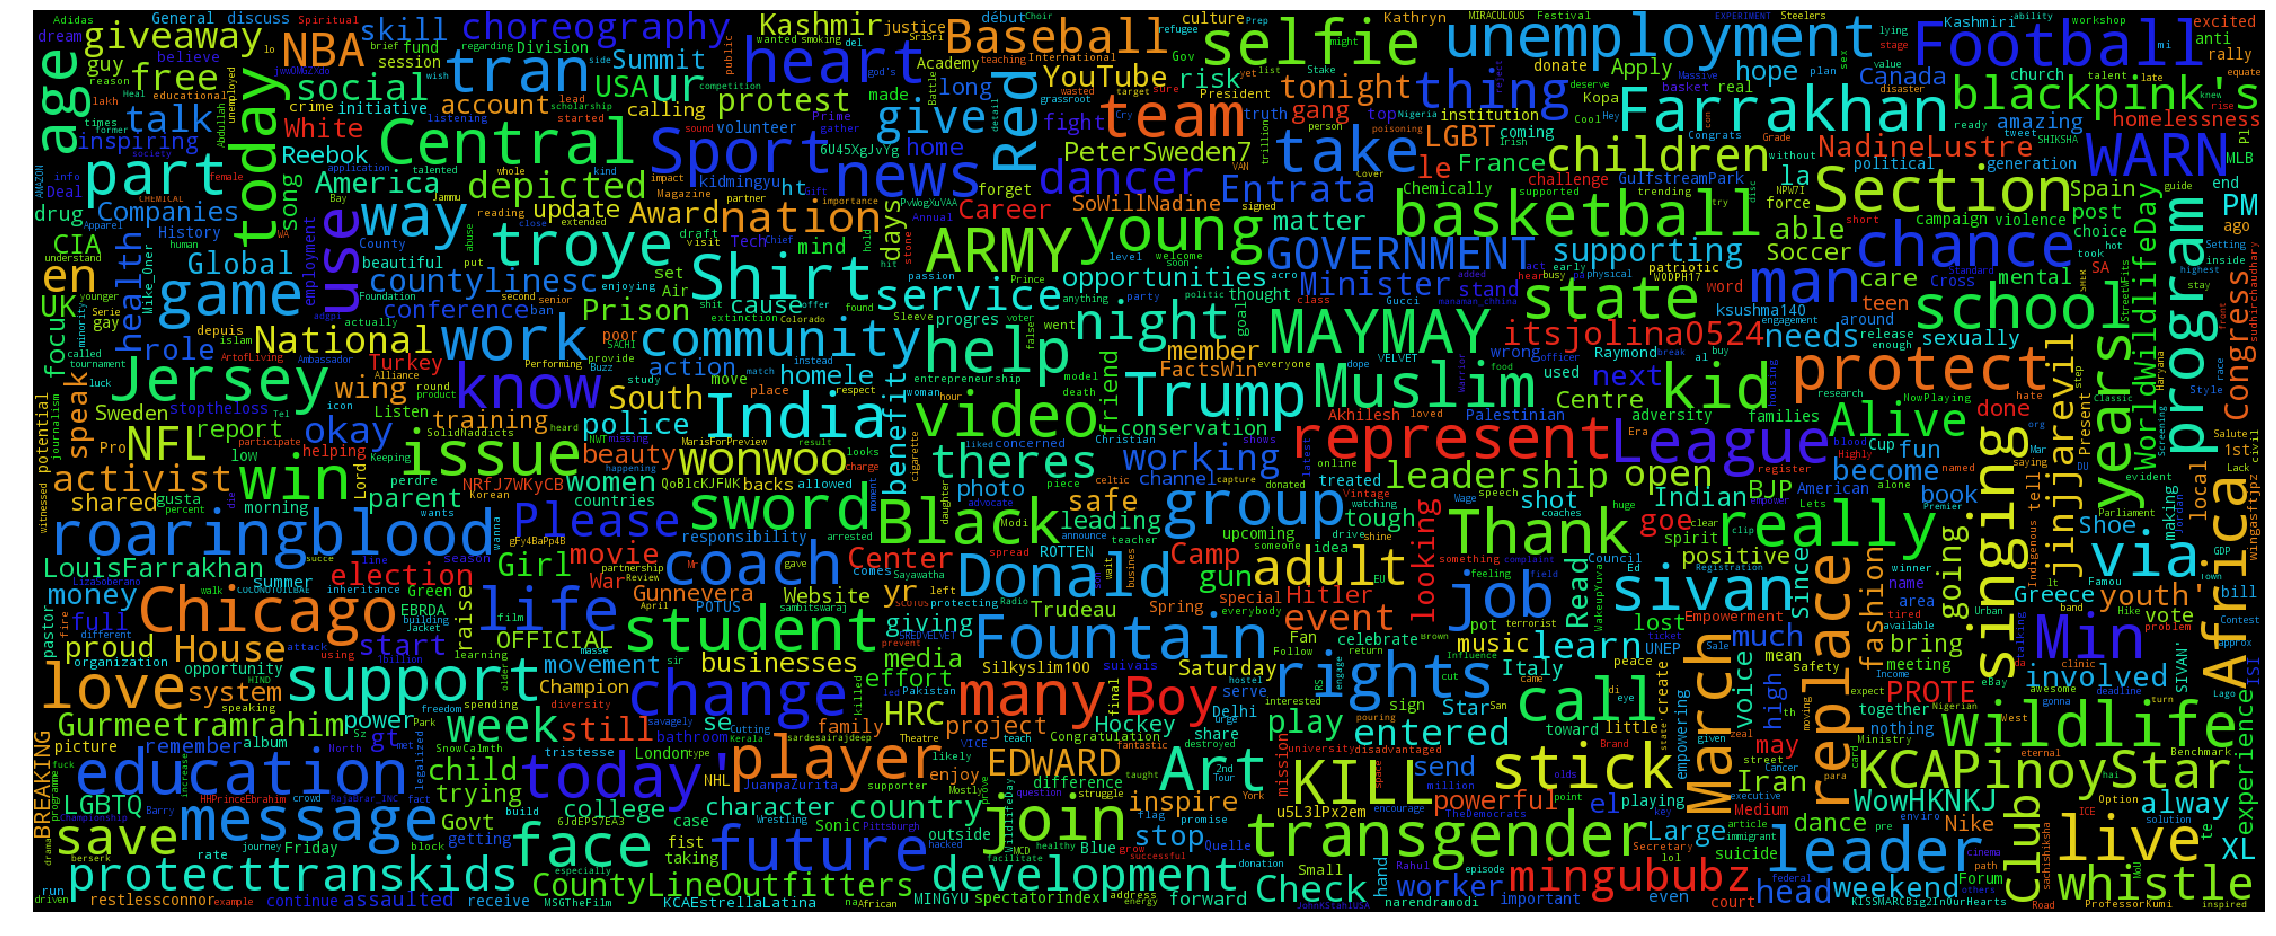

In [97]:
%matplotlib inline

Text = open('texts_from_tweets.txt').read()
wordcloud = WordCloud(max_words=1000, stopwords = stopwords, max_font_size = 55, width = 1980, height = 800).generate(Text)

plt.figure(figsize = (40,40))
plt.imshow(wordcloud)
plt.axis('off')

wordcloud.to_file('youthleadership.png')

plt.show

In [98]:
wordcloud.to_file('youthleadership.png')

In [99]:
#Another approach

from collections import Counter
import re

words = re.findall(r'\w+', Text)
lower_word = [word.lower() for word in words]
word_count = Counter(lower_word)


In [100]:
#delecting stopwords

def remove_multi_key(entries, the_dict):
    for key in entries:
        if key in the_dict:
            del the_dict[key]
            
remove_multi_key(stopwords, word_count)
type(word_count)
word_rank = word_count.most_common()

In [101]:
#write into a text file
with open('Most_frequent_tweet_words.txt', 'w') as fw:
    for k,v in word_count.most_common():
        fw.write("{} , {}\n".format(k,v))
